# PROJETO INTEGRADOR 4

## Importanto as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importanto os dados

In [2]:
### LENDO TODOS OS ARQUIVOS CSV COM INFOS CLIMATICAS QUE BAIXAMOS

import glob
lista_num = []
lista_arquivos = []
for i, file in enumerate (glob.glob("*.csv")):
    lista_arquivos.append(file)
    lista_num.append(i)
    
dictionary = dict(zip(lista_num, lista_arquivos))
print('As opções de localidade são: ' )
display(dictionary)

As opções de localidade são: 


{0: 'barretos.csv',
 1: 'barra_bonita.csv',
 2: 'casa_branca.csv',
 3: 'sao_carlos.csv',
 4: 'marilia.csv',
 5: 'avare.csv',
 6: 'sao_paulo.csv'}

In [3]:
############## ESCOLHENDO A LOCALIDADE ###################

localidade = 0

df = pd.read_csv(dictionary[localidade], sep=';')

In [4]:
#df = pd.read_csv('generatedBy_react-csv.csv', sep=';')

In [5]:
df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,05/11/2022,0,19.2,19.5,18.3,45.0,51.0,44.0,6.9,8.1,6.9,954.4,954.4,954.1,1.3,118.0,2.8,NaN,0.0
1,05/11/2022,100,18.1,19.2,18.1,48.0,49.0,44.0,6.9,7.4,6.6,955.0,955.0,954.4,0.8,139.0,3.7,NaN,0.0
2,05/11/2022,200,17.7,18.4,17.4,49.0,50.0,45.0,6.7,7.1,6.3,955.2,955.2,955.0,1.7,145.0,4.7,NaN,0.0
3,05/11/2022,300,16.8,17.9,16.6,54.0,55.0,48.0,7.4,7.6,6.8,954.6,955.4,954.6,2.2,141.0,5.6,NaN,0.0
4,05/11/2022,400,16.0,16.8,15.7,58.0,60.0,54.0,7.8,7.9,7.3,954.5,954.7,954.5,1.5,138.0,5.6,NaN,0.0


## Verificando o formato da data

In [6]:
df.iloc[0].Data

'05/11/2022'

## Descrição de dados julgados pertinentes 

In [7]:
df.describe()[['Temp. Min. (C)', 'Chuva (mm)', 'Vel. Vento (m/s)']][1::]

,Temp. Min. (C),Chuva (mm),Vel. Vento (m/s)
mean,23.158927,0.218102,1.114168
std,3.892695,1.258513,0.595826
min,12.800000,0.000000,0.100000
25%,20.300000,0.000000,0.600000
50%,21.900000,0.000000,1.000000
75%,26.100000,0.000000,1.500000
max,34.300000,28.000000,4.400000


## Capacidade de realização de filtros por data e um histograma de temperaturas mínimas para a data selecionada

In [8]:
df2 = df.query("Data == '05/11/2022'").copy().reset_index(drop=True)

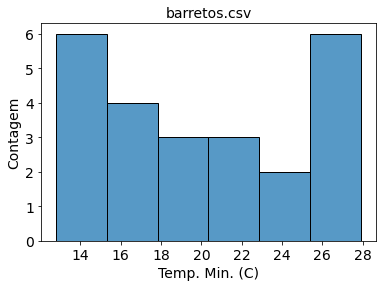

In [9]:
sns.histplot(data=df2["Temp. Min. (C)"])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Temp. Min. (C)", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
### NOVO
plt.title(dictionary[localidade], fontsize=14)
### NOVO
plt.show()

## Conversão para o tipo aproproado de data (cast para datetime)

In [10]:
df.Data = pd.to_datetime(df.Data, dayfirst=True)

## Agrupamento para plot de linhas de precipitação (em mm) por data

In [11]:
df_agrupado = df.groupby(by=["Data"]).max()['Chuva (mm)'].copy().reset_index()
df_agrupado = df_agrupado.sort_values(by='Data')
df_agrupado

,Data,Chuva (mm)
0,2022-11-05,0.0
1,2022-11-06,0.0
2,2022-11-07,0.0
3,2022-11-08,0.0
4,2022-11-09,0.2
...,...,...
147,2023-04-01,0.0
148,2023-04-02,0.0
149,2023-04-03,2.4
150,2023-04-04,1.4


## Plot de linhas de precipitação por mês

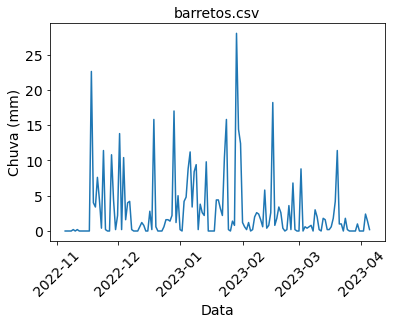

In [12]:
sns.lineplot(x=df_agrupado.Data, y=df_agrupado['Chuva (mm)'])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Chuva (mm)", fontsize=14)
### NOVO
plt.title(dictionary[localidade], fontsize=14)
### NOVO
plt.show()

## CONFRONTANDO LOCALIDADES

In [13]:
print('As opções de localidade são: ' )
display(dictionary)

As opções de localidade são: 


{0: 'barretos.csv',
 1: 'barra_bonita.csv',
 2: 'casa_branca.csv',
 3: 'sao_carlos.csv',
 4: 'marilia.csv',
 5: 'avare.csv',
 6: 'sao_paulo.csv'}

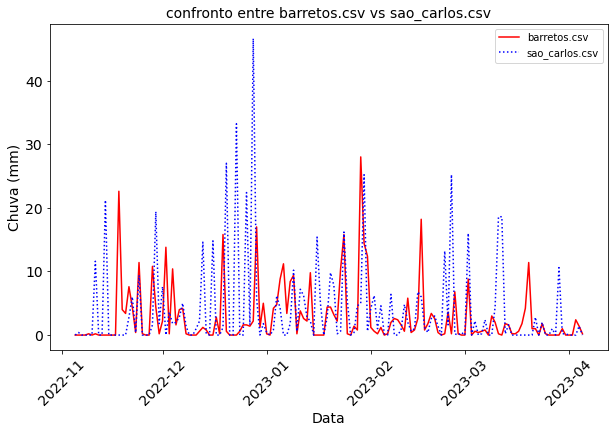

In [36]:
### SELECIONANDO AS LOCALIDADES:
localidade_1 = 0
localidade_2 = 3

df_confronto_1 = pd.read_csv(dictionary[localidade_1], sep=';')
df_confronto_2 = pd.read_csv(dictionary[localidade_2], sep=';')

df_confronto_1.Data = pd.to_datetime(df_confronto_1.Data, dayfirst=True)
df_confronto_2.Data = pd.to_datetime(df_confronto_2.Data, dayfirst=True)

df_agrupado_1 = df_confronto_1.groupby(by=["Data"]).max()['Chuva (mm)'].copy().reset_index()
df_agrupado_1 = df_agrupado_1.sort_values(by='Data')

df_agrupado_2 = df_confronto_2.groupby(by=["Data"]).max()['Chuva (mm)'].copy().reset_index()
df_agrupado_2 = df_agrupado_2.sort_values(by='Data')

plt.figure(figsize=(10,6))

sns.lineplot(x=df_agrupado_1.Data, y=df_agrupado_1['Chuva (mm)'], label=dictionary[localidade_1], color='red', linestyle='-')
sns.lineplot(x=df_agrupado_2.Data, y=df_agrupado_2['Chuva (mm)'], label=dictionary[localidade_2], color='blue', linestyle='dotted')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Chuva (mm)", fontsize=14)
plt.legend()
### NOVO
plt.title('confronto entre {} vs {}'.format(dictionary[localidade_1],dictionary[localidade_2]) , fontsize=14)
### NOVO
plt.show()